In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from io import StringIO
%matplotlib inline

In [2]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Summary of data
### 1:job:admin,technician,services,management,retired,blue-collar,unemployed,entrepreneur,housemaid,unknown,self-employed,student

### 2:marital:married,single,divorced

### 3:education:secondary,tertiary,primary,unknown

### 4:default: yes,no

### 5:housing: yes,no

### 6:loan: yes,no

### 7:deposit :yes,no(dependent variable)

### 8:contact: unknown,cellular,telephone

### 9:month

### 10:poutcome:unknown,other,failure,success



# Numerical data

#### age

#### balance

#### day

#### duration

#### campaign

#### pdays

#### previous

In [3]:
# checking null values
#bank[bank.isnull().any(axis=1)].count()
bank[bank.isnull()].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


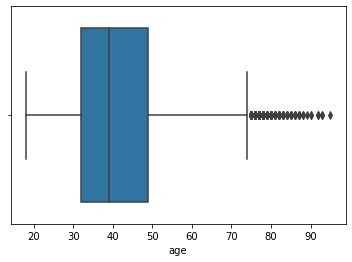

In [5]:
#boxplot of age
g = sns.boxplot(x=bank['age'])

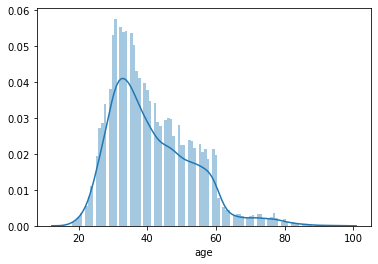

In [6]:
#age distribution
sns.distplot(bank['age'],bins=100)

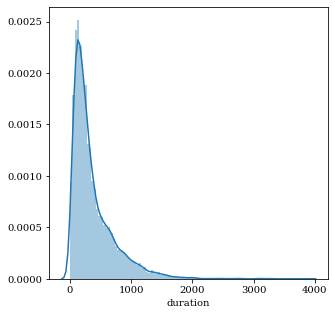

In [7]:
#duration is last contact duration in seconds
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['font.family'] = "serif"
sns.distplot(bank['duration'],bins=100)
#from this plot we understand that most of the customers phone call duration lies in range 0 to 1000 and there are very few customers who are 
#above this range

In [8]:
# converting categorical data
bank_data = bank.copy()

# job

In [9]:
# exploring people who made deposit vs job category
jobs = ['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown']

for job in jobs:
    print(job,"=", len(bank_data[((bank_data['deposit'] == 'yes') & (bank_data['job'] == job))]))

management = 1301
blue-collar = 708
technician = 840
admin. = 631
services = 369
retired = 516
self-employed = 187
student = 269
unemployed = 202
entrepreneur = 123
housemaid = 109
unknown = 34


In [10]:

len(bank_data[((bank_data['deposit'] == 'yes') & (bank_data['job'] == 'management'))])

1301

In [11]:
# diffrent type of job categories and their counts
bank_data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [12]:
# lets combine similar jobs into categories
bank_data['job'] = bank_data['job'].replace(['management','admin.'],'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'],'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired','student','unemployed','unknown'],'other')

In [13]:
#poutcome : outccome of previous marketing campaign
bank_data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [14]:
#lets combine unknown and other as they do are same
bank_data['poutcome'] = bank_data['poutcome'].replace(['unknown','other'],'other')

In [15]:
bank_data['poutcome'].value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [16]:
# lets drop contact because each client is being contacted
bank_data.drop(columns='contact',inplace=True)

In [17]:
#lets convert default value into numerical
bank_data['default']
bank_data['default_cat'] = bank_data['default'].map({'yes':1,'no':0})

In [18]:
bank_data.drop(columns='default',inplace=True)

In [19]:
#this tells wether the client has a house loan or not
bank_data['housing']
bank_data['housig_cat'] = bank_data['housing'].map({'yes':1,'no':0})
bank_data.drop(columns='housing',inplace=True)

In [20]:
#this tells wether the client has a loan or not
bank_data['loan']
bank_data['loan_cat'] = bank_data['loan'].map({'yes':1,'no':0})
bank_data.drop(columns='loan',inplace=True)

In [21]:
# day : last contact day of month
#month: last contact month of year
#we can drop this columns as they do not possess any intrinsic meaning
bank_data.drop(columns='month',inplace=True)
bank_data.drop(columns='day',inplace=True)

In [22]:
#this tells wether the client has a house loan or not
bank_data['deposit']
bank_data['deposit_cat'] = bank_data['deposit'].map({'yes':1,'no':0})
bank_data.drop(columns='deposit',inplace=True)

In [23]:
#pdays number of days that passed by after the client was last contacted from previous campaign
# -1 implies client was not contacted
#lets find out which customers have not been contacted

print('Customers that have not been contacted before : ',len(bank_data[bank_data['pdays'] == -1]))
print('Max number of days for in the column pdays for not contacting the client',bank_data['pdays'].max())

Customers that have not been contacted before :  8324
Max number of days for in the column pdays for not contacting the client 854


In [24]:
# lets map -1 as 10000 to indicate it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1,'pdays'] = 10000

In [25]:
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [26]:
# converting categorical data to dummy variables
bank_with_dummies = pd.get_dummies(data = bank_data,columns=['job','marital','education','poutcome'])

In [27]:
bank_with_dummies.dtypes

age                      int64
balance                  int64
duration                 int64
campaign                 int64
previous                 int64
default_cat              int64
housig_cat               int64
loan_cat                 int64
deposit_cat              int64
recent_pdays           float64
job_blue-collar          uint8
job_entrepreneur         uint8
job_other                uint8
job_pink-collar          uint8
job_self-employed        uint8
job_technician           uint8
job_white-collar         uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
poutcome_failure         uint8
poutcome_other           uint8
poutcome_success         uint8
dtype: object

In [28]:
bank_with_dummies.shape

(11162, 27)

In [29]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housig_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.794033,0.095951
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.404424,0.294537
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


bank_with_dummies is our main working dataset
now lets start visualization on this dataset

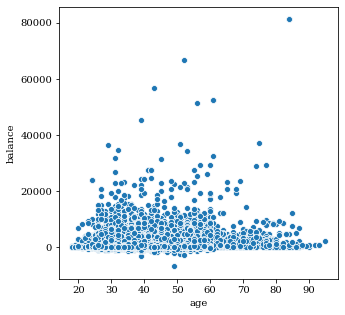

In [30]:
# scatter plot showing age and balance
sns.scatterplot(data = bank_with_dummies,x='age',y='balance')

#accross all ages we observe that majority of people have their savings less than 20000 usd

In [31]:
# lets draw a histogram to observe how poutcome_success(outcome of previous marketing campaign is related to duration or time invested 
# in the client
#sns.countplot(data = bank_with_dummies,x='poutcome_success',y='duration')


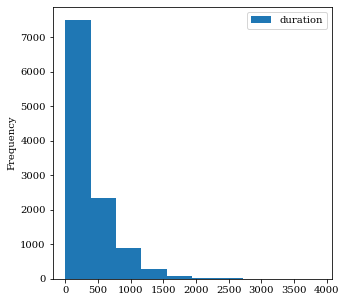

In [32]:
bank_with_dummies.plot(kind='hist',x='poutcome_success',y='duration')

In [33]:
bank_with_dummies

,age,balance,duration,campaign,previous,default_cat,housig_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,1,0
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,1,0
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,1,0
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


In [34]:
# now for sake of building the decision tree lets do analysis on people who signup for term deposit
bank_with_dummies[bank_data['deposit_cat'] == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housig_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.698242,0.184912
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.459064,0.388263
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# people signed up to a term deposit having a personal loan (loan_cat) and housing_loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies['deposit_cat'] == 1) & (bank_with_dummies['housig_cat'] == 1) & (bank_with_dummies['loan_cat'] == 1)])

265

In [36]:
#people signed for a term deposit with a credit default
len((bank_with_dummies['deposit_cat'] == 1) & (bank_with_dummies['default_cat'] == 1))
#many people have signed up

11162

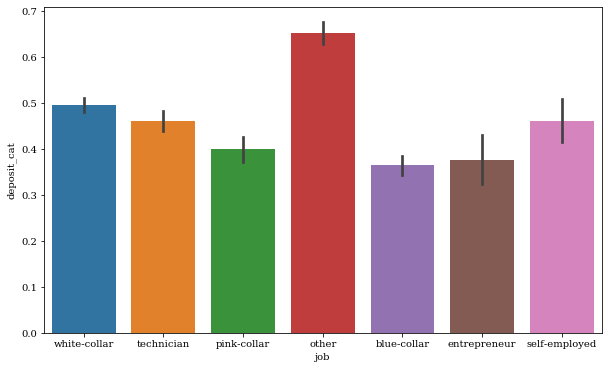

In [37]:
# bar chart for peoples job vs deposit
plt.figure(figsize = (10,6))
sns.barplot(x='job',y='deposit_cat',data=bank_data)

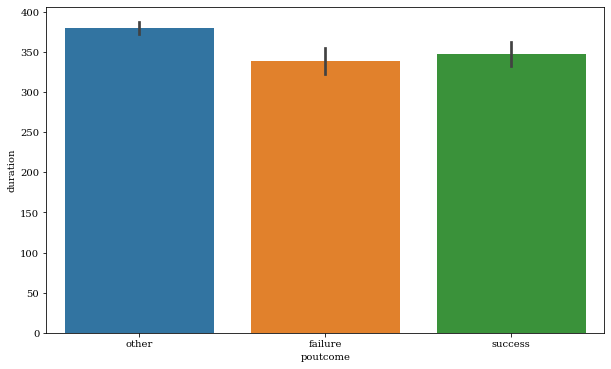

In [38]:
# plot for previous outcome vs call duration
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome',y='duration',data=bank_data)

In [39]:
# lets start classification of this data

In [40]:
bankcl = bank_with_dummies

In [41]:
corr = bankcl.corr()

In [42]:
corr

,age,balance,duration,campaign,previous,default_cat,housig_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,-0.038992,0.062114
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,-0.034524,0.045603
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,0.042725,-0.022578
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,0.128907,-0.091807
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,-0.496921,0.325477
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,0.048403,-0.040272
housig_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,0.031375,-0.136299
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,0.053686,-0.080370
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,-0.224785,0.286642
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,-0.126890,0.119598


Text(0.5, 1, 'Heatmap of Correlation Matrix')

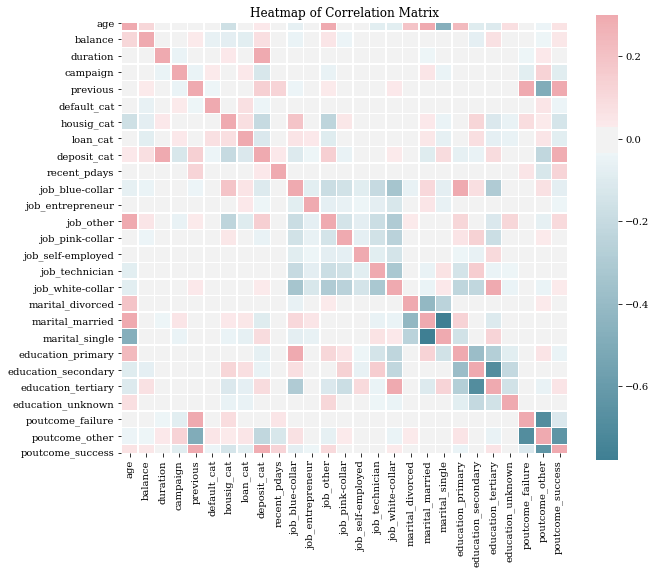

In [43]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [44]:
corr_deposit = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))


In [45]:
corr_deposit = corr_deposit.sort_values(by='deposit_cat',ascending=False)

In [46]:
corr_deposit#this is the dependent variable


,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [47]:
#Train-Test split: 20% test data
data_drop_deposit = bankcl.drop(columns='deposit_cat') # training data
label = bankcl['deposit_cat'] # testing data
data_train,data_test,label_train,label_test = train_test_split(data_drop_deposit,label,test_size=0.2,random_state=50)

In [48]:
# decision tree with dept 2
dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)
dt2.fit(data_train,label_train)
dt2_score_train = dt2.score(data_train,label_train)
print('Training Score:',dt2_score_train)
dt2_score_test = dt2.score(data_test,label_test)
print('Testing score:',dt2_score_test)

Training Score: 0.7285250307985217
Testing score: 0.7268248992386923


In [49]:
#decision tree with depth 3
dt3 = DecisionTreeClassifier(random_state=1,max_depth=3)
dt3.fit(data_train,label_train)
dt3_score_train = dt3.score(data_train,label_train)
print('Training Score:',dt3_score_train)
dt3_score_test = dt3.score(data_test,label_test)
print('Testing score:',dt3_score_test)


Training Score: 0.770411020271027
Testing score: 0.7572772055530677


In [50]:
#decision tree with depth 4
dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)
dt4.fit(data_train,label_train)
dt4_score_train = dt4.score(data_train,label_train)
print('Training score:',dt4_score_train)
dt4_score_test = dt4.score(data_test,label_test)
print('Training score:',dt4_score_train)


Training score: 0.7885541494008288
Training score: 0.7885541494008288


In [51]:
#decision tree with depth 6
dt4 = DecisionTreeClassifier(random_state=1,max_depth=6)
dt4.fit(data_train,label_train)
dt4_score_train = dt4.score(data_train,label_train)
print('Training score:',dt4_score_train)
dt4_score_test = dt4.score(data_test,label_test)
print('Training score:',dt4_score_train)


Training score: 0.8080412140217269
Training score: 0.8080412140217269


In [52]:
# decision tree with maximum depth

dt4 = DecisionTreeClassifier()
dt4.fit(data_train,label_train)
dt4_score_train = dt4.score(data_train,label_train)
print('Training score:',dt4_score_train)
dt4_score_test = dt4.score(data_test,label_test)
print('Training score:',dt4_score_train)


Training score: 1.0
Training score: 1.0


### we can o

In [53]:
# lets create a feature vector
features = data_drop_deposit.columns.tolist()

In [54]:
dd = tree.export_graphviz(dt2,out_file='tree_depth_2.dot',feature_names=features)

In [55]:
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housig_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

In [56]:
#lets investigate most important features with depth =2
dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)
dt2.fit(data_train,label_train)
fi = dt2.feature_importances_
l = len(features)
for i in range(0,len(features)):
    print(features[i],fi[i])

age 0.0
balance 0.0
duration 0.849306123902405
campaign 0.0
previous 0.0
default_cat 0.0
housig_cat 0.0
loan_cat 0.0
recent_pdays 0.0
job_blue-collar 0.0
job_entrepreneur 0.0
job_other 0.0
job_pink-collar 0.0
job_self-employed 0.0
job_technician 0.0
job_white-collar 0.0
marital_divorced 0.0
marital_married 0.0
marital_single 0.0
education_primary 0.0
education_secondary 0.0
education_tertiary 0.0
education_unknown 0.0
poutcome_failure 0.0
poutcome_other 0.0
poutcome_success 0.15069387609759496


In [57]:
# according to this data we saw that duration is the most important feature
data_drop_deposit[['duration']].describe()

,duration
count,11162.000000
mean,371.993818
std,347.128386
min,2.000000
25%,138.000000
50%,255.000000
75%,496.000000
max,3881.000000


In [58]:
# we observed that mean of duration is 371 seconds 

there are two classes in the target variable not signed up and signed up
dt2.classes_

In [59]:
dt2.classes_

array([0, 1])

In [60]:
print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.48515568 0.51484432]]
[1]


In [61]:
preds = dt2.predict(data_test)
print(metrics.accuracy_score(label_test,preds))

0.7268248992386923


In [62]:
probs = dt2.predict_proba(data_test)[:,1]

In [63]:
print(metrics.roc_auc_score(label_test,probs))

0.7880265888143609
